In [1]:
import numpy as np
import pandas as pd
import spicy
import scipy.stats as stats
from scipy.stats import gmean, probplot
from sklearn.cluster import KMeans, k_means
from sklearn import metrics
import matplotlib.pyplot as plt
from composition_stats import closure, clr, centralize, center, multiplicative_replacement
%matplotlib inline

In [2]:
# User inputs: 
#  save, name, directory
#  number_of_components
#  number_of_clusters

In [3]:
# Save figures and .csv files?

# USER INPUT
save = False
name = '________'  # This will be the prefix for produced figures and .csv files

# Bring in the dataset

# USER INPUT
directory = 'C:/Users/.....'

df = pd.read_csv(directory)

# Remove nondata
df2=df[df.columns[~df.columns.isin(['Sample','Latitude', 'Longitude'])]]
df2.head()

# Create an array from dataset
arr=df2.to_numpy()
arr_clo=closure(arr)

# Flatten the 2d array into a 1d array
arr_clo_flat = arr_clo.flatten()

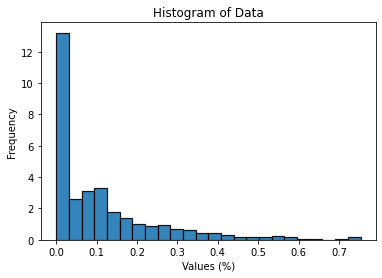

In [9]:
# Create histogram
n, bins, patches = plt.hist(arr_clo_flat, bins='auto', density=True, alpha=0.9, edgecolor='black', linewidth=1.2)

# Add labels and titles to plot
plt.xlabel('Values (%)')
plt.ylabel('Frequency')
plt.title('Histogram of Data')

if save == True:
    plt.savefig('%s_Hist_Data.png' % (name), format='png')
plt.show()

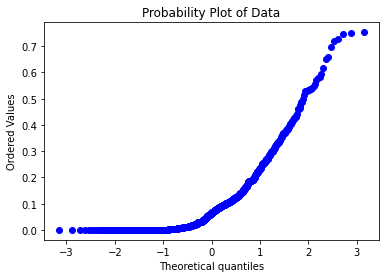

In [10]:
#Create probability plot
fig, ax = plt.subplots()
stats.probplot(arr_clo_flat, plot=ax, fit=False)
ax.set_title('Probability Plot of Data')

if save == True:
    plt.savefig('%s_QQ_Data.png' % (name), format='png')
plt.show()

In [11]:
arr_clrT=clr(arr_clo)
print("arr_clrT Mean: %s \narr_clrT Std: %s" % (arr_clrT.mean(), arr_clrT.std()))

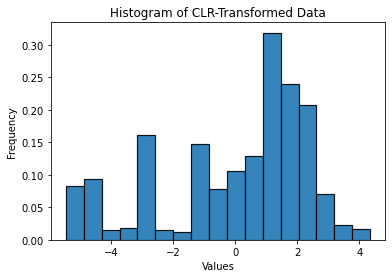

In [13]:
# Flatten the 2d array into a 1d array
arr_clrT_flat = arr_clrT.flatten()

# Calculate optimal bin size using Freedman-Diaconis rule
q25, q75 = np.percentile(arr_clrT_flat, [25, 75])
iqr = q75 - q25
bin_size = 2 * iqr / (243**(1/3))

# Create histogram with optimal bin size
n, bins, patches = plt.hist(arr_clrT_flat, bins='auto', density=True, alpha=0.9, edgecolor='black', linewidth=1.2)

# Add labels and titles to plot
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Histogram of CLR-Transformed Data')

if save == True:
    plt.savefig('%s_Hist_CLR.png' % (name), format='png')
plt.show()

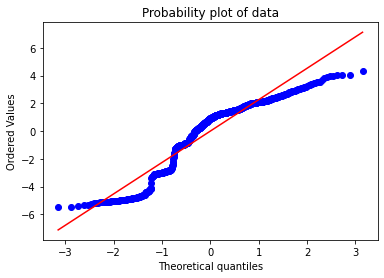

In [14]:
# Create a probability plot
fig, ax = plt.subplots()
stats.probplot(arr_clrT_flat, plot=ax)
ax.set_title('Probability plot of data')

if save == True:
    plt.savefig('%s_QQ_CLR.png' % (name), format='png')
plt.show()

# Principal Component Analysis

In [15]:
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import MinMaxScaler, MaxAbsScaler, StandardScaler, scale, RobustScaler

X= arr_clrT

# Preprocessing using scikit-learn tools
Xs=StandardScaler().fit_transform(X) #Standardize the data to zero mean and unit variance

# Other options
#Xs = MinMaxScaler().fit_transform(X)   #scale data to lie between a given minimum and maximum value; by default is from 0 to 1. Example of custom range: MinMaxScaler(feature_range=(-1,1))
#Xs=MaxAbsScaler().fit_transform(X)
#Xs=scale(X)
#Xs=RobustScaler().fit_transform(X) #Good for datasets with outliers

print("Xs Mean: %s \nXs Std: %s" % (Xs.mean(), Xs.std()))

In [18]:
SD_data = pd.DataFrame(Xs)
print(SD_data)
if save == True:
    SD_data.to_csv('%s_SD_data.csv' % (name))

           0         1         2         3         4         5         6  \
0  -1.129452  0.166132 -2.237115 -0.667462 -2.095094  3.110833  3.000211   
1  -2.086810  0.133281 -1.137536 -0.169079 -0.862567  0.667215  1.952023   
2   3.000349  0.048004  1.168391 -0.555583  1.930855 -0.804713 -0.917121   
3   0.276954 -1.358500  1.724672 -0.295292  2.741613 -1.251131 -1.637331   
4   0.002156 -0.064547  0.859804 -0.183674  2.404830 -0.085750 -0.670554   
..       ...       ...       ...       ...       ...       ...       ...   
88 -0.445911 -0.308288 -0.294798 -0.280106  0.123932  0.094089  0.351143   
89  0.098086 -1.407209  0.547700 -2.068685  0.915241 -0.805403 -0.917824   
90 -0.288381 -0.321744 -1.743428 -0.845151 -1.423954  2.343154  2.243729   
91  0.194601 -0.736421  0.045721 -0.765545  0.340513 -0.300400 -0.360187   
92  0.000681 -0.333657  0.123302  0.176472 -0.257564 -0.270719 -0.144293   

           7         8  
0   1.576277  3.586064  
1   0.798617  2.343296  
2  -3.267839

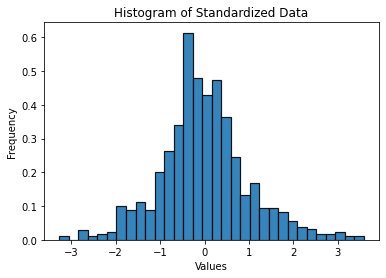

In [19]:
# Flatten the 2d array into a 1d array
Xs_flat = Xs.flatten()

# Calculate optimal bin size using Freedman-Diaconis rule
q25, q75 = np.percentile(Xs_flat, [25, 75])
iqr = q75 - q25
bin_size = 2 * iqr / (243**(1/3))

# Create histogram
n, bins, patches = plt.hist(Xs_flat, bins='auto', density=True, alpha=0.9, edgecolor='black', linewidth=1.2)

# Add labels and titles to plot
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Histogram of Standardized Data')

if save == True:
    plt.savefig('%s_Hist_Standardized.png' % (name), format='png')
plt.show()

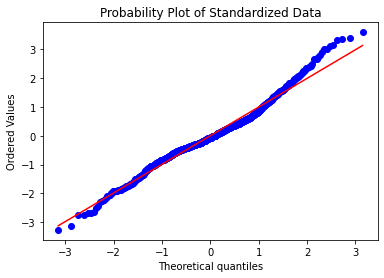

In [20]:
# Create probability plot
fig, ax = plt.subplots()
stats.probplot(Xs_flat, plot=ax)
ax.set_title('Probability Plot of Standardized Data')

if save == True:
    plt.savefig('%s_QQ_Standardized.png' % (name), format='png')
plt.show()

In [21]:
n_components = X.shape[1]

#Running PCA on all components
pca=PCA(n_components=n_components)
X_r=pca.fit(Xs).transform(Xs)

#calculating the 95% variance
total_variance = sum(pca.explained_variance_)
print('Total variance in the dataset is:', total_variance)
var_95 = total_variance*0.95
print('The 95% variance is: ', var_95)
print('')

#Creating a df with the components and explained variance
a = zip(range(0,n_components), pca.explained_variance_)
a = pd.DataFrame(a, columns=['PCA Comp', 'Explained Variance'])

#Trying to find 95%... 
print('Variance explained with 2 components:', sum(a['Explained Variance'][0:2]))
print('Variance explained with 3 components:', sum(a['Explained Variance'][0:3]))
print('Variance explained with 4 components:', sum(a['Explained Variance'][0:4]))
print('Variance explained with 5 components:', sum(a['Explained Variance'][0:5]))
print('Variance explained with 6 components:', sum(a['Explained Variance'][0:6]))


Total variance in the dataset is: 9.097826086956522
The 95% variance is:  8.642934782608695

Variance explained with 2 components: 6.451892813732371
Variance explained with 3 components: 7.470695171326113
Variance explained with 4 components: 8.25977853205623
Variance explained with 5 components: 8.716710159271827
Variance explained with 6 components: 8.928606517876286


In [22]:
print(a)

   PCA Comp  Explained Variance
0         0        4.724129e+00
1         1        1.727764e+00
2         2        1.018802e+00
3         3        7.890834e-01
4         4        4.569316e-01
5         5        2.118964e-01
6         6        1.102580e-01
7         7        5.896158e-02
8         8        6.221472e-30


In [23]:
print(pca.explained_variance_ratio_)

[5.19259113e-01 1.89909512e-01 1.11983055e-01 8.67331770e-02
 5.02242649e-02 2.32908781e-02 1.21191579e-02 6.48084256e-03
 6.83841557e-31]


In [24]:
# Calculate explained variance % for each PC (up to 5)
PC_explained_list=[]
for PC in range(0, 5):
    PC_Explained = (pca.explained_variance_ratio_[PC]*100).round(2)
    PC_explained_list.append(PC_Explained)
    print('PC%s: %s' % (PC+1, PC_Explained))

PC1: 51.93
PC2: 18.99
PC3: 11.2
PC4: 8.67
PC5: 5.02


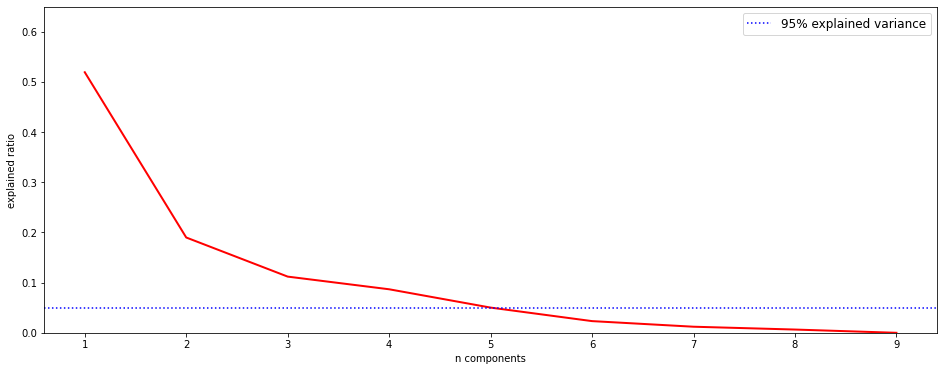

In [25]:
# calculate the cumulative sum of explained variance ratio
cumulative_var_ratio = np.cumsum(pca.explained_variance_ratio_)

# find the index where the cumulative sum first exceeds 0.95
threshold_idx = np.where(cumulative_var_ratio >= 0.95)[0]
if threshold_idx.size == 0:
    # if no index is found, set the threshold index to the last index
    threshold_idx = len(cumulative_var_ratio) - 1
else:
    # get the first index where the cumulative sum exceeds 0.95
    threshold_idx = threshold_idx[0]

# create a scree plot
fig, ax1 = plt.subplots(1, figsize=(16, 6))
x_axis = np.arange(len(pca.explained_variance_ratio_))
ax1.plot(x_axis, pca.explained_variance_ratio_, linewidth=2, c='r')
ax1.set_xticks(x_axis)
ax1.set_xticklabels(x_axis+1)
ax1.set_xlabel('n components')
ax1.set_ylabel('explained ratio')

# set the y-axis limit to be slightly larger than 1
ax1.set_ylim([0, 0.65])

# add a horizontal dotted line at 95% explained variance ratio
ax1.axhline(y=pca.explained_variance_ratio_[threshold_idx], linestyle=':',label='95% explained variance', c='blue')

# add legend and display the plot
ax1.legend(prop=dict(size=12))

if save == True:
    plt.savefig('%s_PCA-ScreePlot.png' % (name), format='png')
plt.show()

In [26]:
# Running PCA again, this time with the specified amount of components

# USER INPUT
number_of_components = 3

pca=PCA(n_components=number_of_components)
X_r=pca.fit(Xs).transform(Xs)
#Running kmeans after PCA to help improve the kmeans clustering
no_of_clusters=range(2,20) #[2,3,4,5...]
inertia=[]
#Creates an empty list
for f in no_of_clusters:
    kmeans = KMeans(n_clusters=f, random_state=0)
    kmeans = kmeans.fit(X_r)
    u = kmeans.inertia_
    inertia.append(u)
    print('The inertia for :', f, 'clusters is', u)

The inertia for : 2 clusters is 411.9209279557657
The inertia for : 3 clusters is 316.21434018953863
The inertia for : 4 clusters is 255.4053822246628
The inertia for : 5 clusters is 215.67230051658885
The inertia for : 6 clusters is 185.4761840625239
The inertia for : 7 clusters is 160.75624617403867
The inertia for : 8 clusters is 135.76731307012517
The inertia for : 9 clusters is 116.87941843118777
The inertia for : 10 clusters is 105.29204875512326
The inertia for : 11 clusters is 96.09258600641596
The inertia for : 12 clusters is 88.55479890095722
The inertia for : 13 clusters is 81.48562134228001
The inertia for : 14 clusters is 80.39067142467839
The inertia for : 15 clusters is 70.46775533079773
The inertia for : 16 clusters is 66.85741905050162
The inertia for : 17 clusters is 62.42301923945615
The inertia for : 18 clusters is 56.560512159174735
The inertia for : 19 clusters is 53.410677201181194


In [27]:
print(pca.explained_variance_ratio_)

[0.51925911 0.18990951 0.11198305]


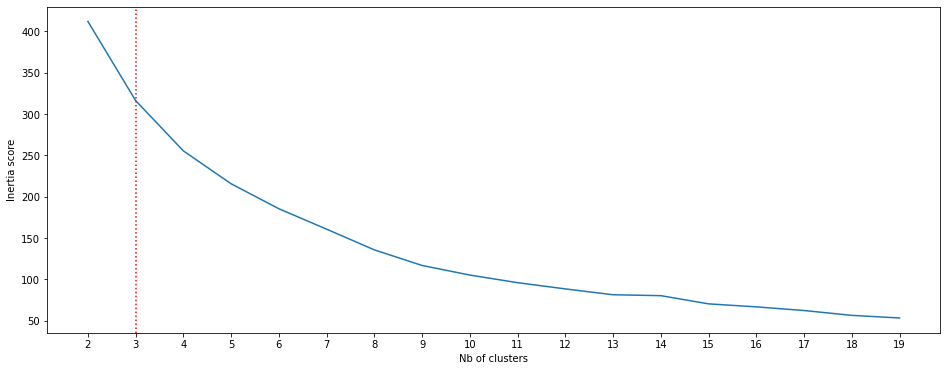

In [28]:
#Making a scree plot of inertia scores
fig, (ax1)=plt.subplots(1, figsize=(16,6))
xx=np.arange(len(no_of_clusters))
ax1.plot(xx, inertia)
ax1.set_xticks(xx)
ax1.set_xticklabels(no_of_clusters)
plt.xlabel('Nb of clusters')
plt.ylabel('Inertia score')
24
plt.axvline(1, color='red', linestyle=':')  #plot a line for Nb. of clusters based on the 'elbow method'
if save == True:
    plt.savefig('%s_Kmeans-ScreePlot.png' % (name), format='png')

In [29]:
no_of_clusters=range(2,20) #[2,3,4,5...]
Index2=[]    #Creates an empty list

for i in no_of_clusters:
    kmeans=KMeans(n_clusters=i, random_state=2)
    kmeans=kmeans.fit(X_r)
    CH=metrics.calinski_harabasz_score(X_r, kmeans.labels_)
    Index2.append(CH)   # This will populate the inertia list with u
    print("The Calinski Harabasz score for :", i, "clusters is:", CH)

The Calinski Harabasz score for : 2 clusters is: 60.83656796640997
The Calinski Harabasz score for : 3 clusters is: 52.8092201345186
The Calinski Harabasz score for : 4 clusters is: 50.2003734029709
The Calinski Harabasz score for : 5 clusters is: 48.109545781012486
The Calinski Harabasz score for : 6 clusters is: 47.332739028559565
The Calinski Harabasz score for : 7 clusters is: 45.472617234511986
The Calinski Harabasz score for : 8 clusters is: 49.50161371121879
The Calinski Harabasz score for : 9 clusters is: 51.235749782193
The Calinski Harabasz score for : 10 clusters is: 49.08605423539598
The Calinski Harabasz score for : 11 clusters is: 50.76587564818465
The Calinski Harabasz score for : 12 clusters is: 47.22083866557876
The Calinski Harabasz score for : 13 clusters is: 48.713323453984565
The Calinski Harabasz score for : 14 clusters is: 48.65009751526885
The Calinski Harabasz score for : 15 clusters is: 48.501124567550725
The Calinski Harabasz score for : 16 clusters is: 49.69

In [30]:
# create a KMeans model with n clusters

# USER INPUT
number_of_clusters = 4

kmeans2=KMeans(n_clusters=number_of_clusters)

# fit the model to your data
kmeans2=kmeans2.fit(X_r)

# predict the cluster labels for your data
cluster_labels=kmeans2.predict(X_r)
cluster_labels = cluster_labels +1

# calculating the counts of the clusters
unique, counts=np.unique(kmeans2.labels_, return_counts=True)
counts=counts.reshape(1,number_of_clusters) #one row and n columns (depending on number of clusters)

# Creating a dataframe
cluster_columns = []
for n in range(0,number_of_clusters):
    cluster_columns.append('Cluster %s' % (n+1))
countscldf2=pd.DataFrame(counts, columns=cluster_columns)

# display
countscldf2

,Cluster 1,Cluster 2,Cluster 3,Cluster 4
0,37,14,14,28


In [31]:
pc_columns=[]
for n in range(0,number_of_components):
    pc_columns.append('PC%s' % (n+1))
loadings = pd.DataFrame(pca.components_.T, columns=pc_columns, index=df2.columns)
loadings.index.name='Elements' #To name the index column
loadings['Elements']=loadings.index #the index is copied on to a new column with column name
loadings = loadings.reset_index(drop=True) #the index replaced with sequence of numbers

In [32]:
PC1_sorted=loadings.sort_values(by=['PC1'])
PC1_sorted

,PC1,PC2,PC3,Elements
2,-0.412411,-0.082139,-0.166537,Ca
4,-0.384416,0.072127,0.200527,Mg
0,0.012626,-0.403402,0.698991,Mn
8,0.246932,0.558966,0.344428,K
3,0.250242,-0.546122,-0.327747,Cr
7,0.291119,0.156462,-0.422615,Na
1,0.326761,-0.406861,0.159917,Fe
5,0.428065,0.049509,0.099606,Ti
6,0.428513,0.148853,0.057603,Al


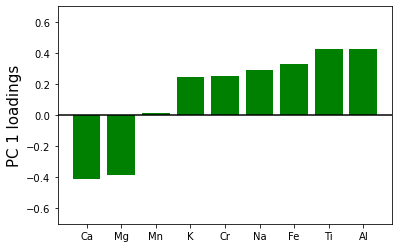

In [33]:
plt.bar((PC1_sorted['Elements']), PC1_sorted['PC1'], linewidth=2., color='green')
plt.ylim((-0.7, 0.7))
plt.ylabel('PC 1 loadings', fontsize=15)
plt.axhline(0,linestyle='-', c='black')

if save == True:
    plt.savefig('%s_PC1_Loadings.png' % (name), format='png')
plt.show()

In [34]:
PC2_sorted=loadings.sort_values(by=['PC2'])
PC2_sorted

,PC1,PC2,PC3,Elements
3,0.250242,-0.546122,-0.327747,Cr
1,0.326761,-0.406861,0.159917,Fe
0,0.012626,-0.403402,0.698991,Mn
2,-0.412411,-0.082139,-0.166537,Ca
5,0.428065,0.049509,0.099606,Ti
4,-0.384416,0.072127,0.200527,Mg
6,0.428513,0.148853,0.057603,Al
7,0.291119,0.156462,-0.422615,Na
8,0.246932,0.558966,0.344428,K


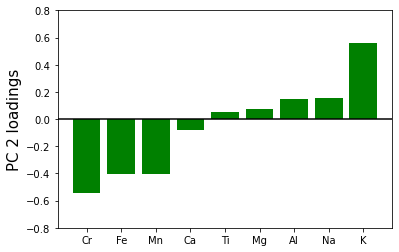

In [35]:
plt.bar((PC2_sorted['Elements']), PC2_sorted['PC2'], linewidth=2., color='green')
plt.ylim((-0.8, 0.8)) 
plt.ylabel('PC 2 loadings', fontsize=15)
plt.axhline(0,linestyle='-', c='black')

if save == True:
    plt.savefig('%s_PC2_Loadings.png' % (name), format='png')
plt.show()

In [36]:
PC3_sorted=loadings.sort_values(by=['PC3'])
PC3_sorted

,PC1,PC2,PC3,Elements
7,0.291119,0.156462,-0.422615,Na
3,0.250242,-0.546122,-0.327747,Cr
2,-0.412411,-0.082139,-0.166537,Ca
6,0.428513,0.148853,0.057603,Al
5,0.428065,0.049509,0.099606,Ti
1,0.326761,-0.406861,0.159917,Fe
4,-0.384416,0.072127,0.200527,Mg
8,0.246932,0.558966,0.344428,K
0,0.012626,-0.403402,0.698991,Mn


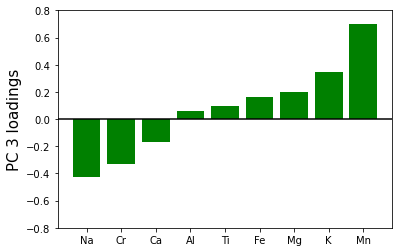

In [37]:
plt.bar((PC3_sorted['Elements']), PC3_sorted['PC3'], linewidth=2., color='green')
plt.ylim((-0.8, 0.8)) 
plt.ylabel('PC 3 loadings', fontsize=15)
plt.axhline(0,linestyle='-', c='black')

if save == True:
    plt.savefig('%s_PC3_Loadings.png' % (name), format='png')
plt.show()

In [38]:
a_=pca.components_.copy()
a_T=a_.T
print(a_T)

[[ 0.01262571 -0.40340243  0.69899134]
 [ 0.32676093 -0.4068613   0.15991674]
 [-0.41241079 -0.08213872 -0.16653677]
 [ 0.25024187 -0.54612202 -0.32774741]
 [-0.38441592  0.07212693  0.20052736]
 [ 0.42806542  0.04950861  0.09960557]
 [ 0.42851263  0.14885269  0.05760315]
 [ 0.29111865  0.15646246 -0.42261501]
 [ 0.24693214  0.55896629  0.34442825]]


Explained variance (first five components): [0.51925911 0.18990951 0.11198305]


<Figure size 432x288 with 0 Axes>

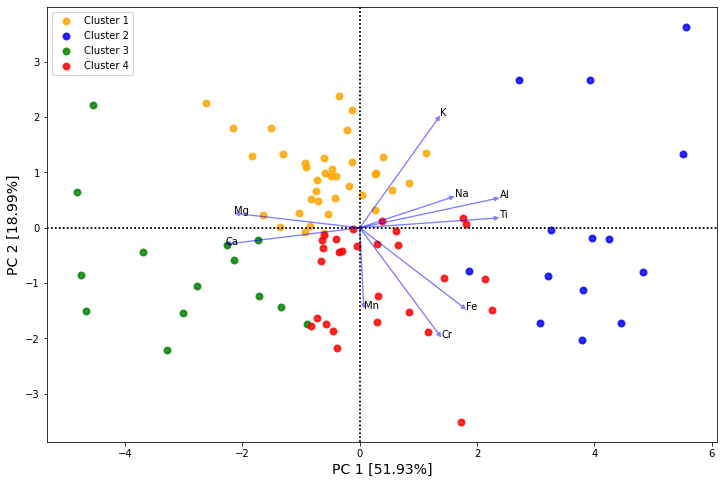

In [39]:
y_num = cluster_labels
target_names = cluster_columns
#Percentage of variance explained for each component
print('Explained variance (first five components): %s' % str(pca.explained_variance_ratio_))
#PLotting the data (pc1 V. pc2)
plt.figure()
plt.figure(figsize=(12,8))
colors = ['orange','blue', 'green', 'red', 'purple', 'black']
lw=2
# Get the absolute maximum value of PC1 and PC2 scores
PC1_abs_max = np.abs(X_r[:, 0]).max()
PC2_abs_max = np.abs(X_r[:,1]).max()
n = pca.components_.T.shape[0]
for color, i, target_name in zip(colors, range(1,number_of_clusters+1), target_names):
    plt.scatter(X_r[y_num == i, 0], X_r[y_num == i, 1], color=color, alpha=.8,lw=lw, label=target_name)
#Add the loading vectors scaled to the PC scores
for i in range(n):
    plt.quiver(0, 0, pca.components_.T[i,0]*PC1_abs_max, pca.components_.T[i,1]*PC2_abs_max,color = 'b',alpha = 0.5, width=0.002, headwidth=4,headlength=4, angles='xy', scale_units='xy', scale=1)
plt.legend(loc='best', shadow=False, scatterpoints=1)
#plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.6)
#This would used to put the legend outside the plot
plt.xlabel(f'PC 1 [{PC_explained_list[0]}%]', fontsize=14)
plt.ylabel(f'PC 2 [{PC_explained_list[1]}%]', fontsize=14)
plt.axvline(0,linestyle=':', c='black')
plt.axhline(0, linestyle=':', c='black')
for col in list(range(0, len(df2.columns))):
    plt.text(a_T[col,0]*PC1_abs_max, a_T[col,1]*PC2_abs_max, df2.columns[col])

plt.axvline(0,linestyle=':', c='black')
plt.axhline(0, linestyle=':', c='black')
if save == True:
    plt.savefig('%s_PC1_PC2.pdf' % (name))
    plt.savefig('%s_PC1_PC2.png' % (name), format='png')
plt.show()

Explained variance (first five components): [0.51925911 0.18990951 0.11198305]


<Figure size 432x288 with 0 Axes>

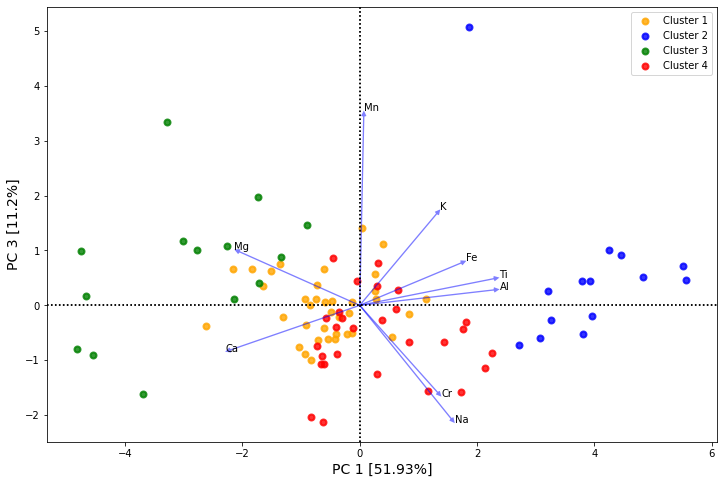

In [40]:
y_num = cluster_labels
target_names = cluster_columns
#Percentage of variance explained for each component
print('Explained variance (first five components): %s' % str(pca.explained_variance_ratio_))
#PLotting the data (pc1 V. pc3)
plt.figure()
plt.figure(figsize=(12,8))
colors = ['orange','blue', 'green', 'red', 'purple', 'black']
lw=2
# Get the absolute maximum value of PC1 and PC3 scores
PC1_abs_max = np.abs(X_r[:, 0]).max()
PC3_abs_max = np.abs(X_r[:,2]).max()
n = pca.components_.T.shape[0]
for color, i, target_name in zip(colors, range(1,number_of_clusters+1), target_names):
    plt.scatter(X_r[y_num == i, 0], X_r[y_num == i, 2], color=color, alpha=.8,lw=lw, label=target_name)
#Add the loading vectors scaled to the PC scores
for i in range(n):
    plt.quiver(0, 0, pca.components_.T[i,0]*PC1_abs_max, pca.components_.T[i,2]*PC3_abs_max,color = 'b',alpha = 0.5, width=0.002, headwidth=4,headlength=4, angles='xy', scale_units='xy', scale=1)
plt.legend(loc='best', shadow=False, scatterpoints=1)
#plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.6)
#This would used to put the legend outside the plot
plt.xlabel(f'PC 1 [{PC_explained_list[0]}%]', fontsize=14)
plt.ylabel(f'PC 3 [{PC_explained_list[2]}%]', fontsize=14)
plt.axvline(0,linestyle=':', c='black')
plt.axhline(0, linestyle=':', c='black')
for col in list(range(0, len(df2.columns))):
    plt.text(a_T[col,0]*PC1_abs_max, a_T[col,2]*PC3_abs_max, df2.columns[col])

plt.axvline(0,linestyle=':', c='black')
plt.axhline(0, linestyle=':', c='black')
if save == True:
    plt.savefig('%s_PC1_PC3.pdf' % (name))
    plt.savefig('%s_PC1_PC3.png' % (name), format='png')

In [41]:
df_PCscores=pd.DataFrame(X_r, columns=pc_columns)
df_PCscores

,PC1,PC2,PC3
0,5.562663,3.636907,0.459949
1,2.708815,2.669531,-0.716969
2,-3.278000,-2.203804,3.337611
3,-4.744470,-0.854914,0.995917
4,-2.781139,-1.044349,1.013371
...,...,...,...
88,0.279400,0.991784,0.118602
89,-2.156484,1.808642,0.660850
90,3.923721,2.672608,0.452362
91,-0.743599,0.656145,0.107896


In [42]:
df_PCscores.insert(len(pc_columns), "Cluster", cluster_labels)
#df_PCscores.insert(0, "Sample", df)
df_PCscores.head(10)

,PC1,PC2,PC3,Cluster
0,5.562663,3.636907,0.459949,2
1,2.708815,2.669531,-0.716969,2
2,-3.278000,-2.203804,3.337611,3
3,-4.744470,-0.854914,0.995917,3
4,-2.781139,-1.044349,1.013371,3
5,-4.671200,-1.503082,0.170472,3
6,-0.182550,0.749669,-0.138501,1
7,-0.927113,1.165020,0.119209,1
8,-1.339650,-1.433820,0.875213,3
9,-0.130787,1.184914,0.056965,1


In [43]:
# Re-insert nondata
extracted_col2 = df["Longitude"]
df_PCscores.insert(0, "Longitude", extracted_col2)
extracted_col3 = df["Latitude"]
df_PCscores.insert(0, "Latitude", extracted_col3)
extracted_col = df["Sample"]
df_PCscores.insert(0, "Sample", extracted_col)

df_PCscores.head(10)

,Sample,Latitude,Longitude,PC1,PC2,PC3,Cluster
0,20PXN001B,62.462686,-116.066170,5.562663,3.636907,0.459949,2
1,20PXN002B,62.462213,-116.055735,2.708815,2.669531,-0.716969,2
2,20PXN003B,62.473457,-116.134645,-3.278000,-2.203804,3.337611,3
3,20PXN004B,62.472973,-116.133138,-4.744470,-0.854914,0.995917,3
4,20PXN005B,62.447140,-116.144952,-2.781139,-1.044349,1.013371,3
5,20PXN008B,62.408645,-116.102688,-4.671200,-1.503082,0.170472,3
6,20PXN009B,62.294589,-116.429455,-0.182550,0.749669,-0.138501,1
7,20PXN010B,62.239894,-116.351572,-0.927113,1.165020,0.119209,1
8,20PXN012B,62.128373,-116.248411,-1.339650,-1.433820,0.875213,3
9,20PXN013B,62.411864,-116.087406,-0.130787,1.184914,0.056965,1


In [44]:
if save == True:
    df_PCscores.to_csv('%s_PC-Score.csv' % (name), index=False)